<a href="https://colab.research.google.com/github/SarvinSaravi/computer-vision-samples/blob/main/CNN_Autoencoder_DenoisingAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AutoEncoder in Keras

In [2]:
# @title setup and imports

import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.datasets import mnist


In [3]:
# @title Dataloading

(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
# @title Noramalization

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [5]:
# @title Reshaping

x_train = x_train.reshape((len(x_train), 28, 28, 1))
x_test = x_test.reshape((len(x_test), 28, 28, 1))

x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

# Noise Section

In [6]:
# @title Set and Add noise

noise_factor = 0.6
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [9]:
# @title Clip the values
# range of 0-1

x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)


# Exploratory Data Analysis
Visualization

In [15]:
# @title Randomly Select an Image

index = np.random.randint(len(x_test))
index

1170

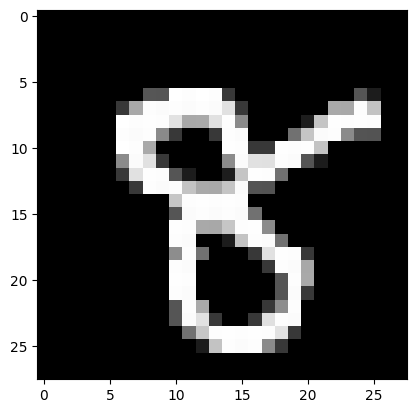

In [16]:
# @title Plot the Main Image

plt.imshow(x_test[index].reshape(28, 28))
# plt.show()
plt.gray()

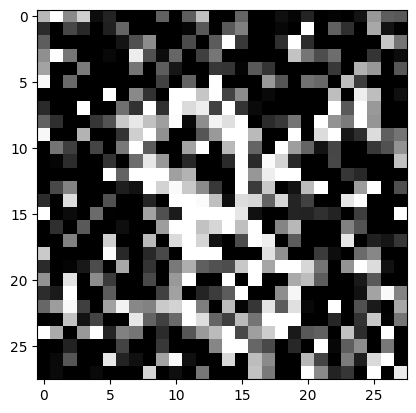

In [17]:
# @title Plot the Noisy Image

plt.imshow(x_test_noisy[index].reshape(28, 28))
plt.show()
# plt.gray()

# Model Creation

In [18]:
# @title Defining the Model

model = Sequential([
                   # Encoder Network
                   Conv2D(32, 3, activation='relu', padding='same', input_shape=(28, 28, 1)),
                   MaxPooling2D(2, padding='same'),
                   Conv2D(16, 3, activation='relu', padding='same'),
                   MaxPooling2D(2, padding='same'),

                   # Decoder Network
                   Conv2D(16, 3, activation='relu', padding='same'),
                   UpSampling2D(2),
                   Conv2D(32, 3, activation='relu', padding='same'),
                   UpSampling2D(2),

                   # Output Layer
                   Conv2D(1, 3, activation='sigmoid', padding='same')
])

model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 16)            │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,193 (47.63 KB)

 Trainable params: 12,193 (47.63 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# @title Train the Model

model.fit(x_train_noisy, x_train, epochs=20, batch_size=256, validation_data=(x_test_noisy, x_test))

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 121s 501ms/step - loss: 0.3488 - val_loss: 0.1520
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 105s 448ms/step - loss: 0.1480 - val_loss: 0.1357
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 142s 449ms/step - loss: 0.1352 - val_loss: 0.1305
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 148s 473ms/step - loss: 0.1304 - val_loss: 0.1267
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 136s 447ms/step - loss: 0.1271 - val_loss: 0.1239
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 142s 447ms/step - loss: 0.1246 - val_loss: 0.1223
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 140s 438ms/step - loss: 0.1229 - val_loss: 0.1213
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 144s 448ms/step - loss: 0.1215 - val_loss: 0.1194
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 103s 440ms/step - loss: 0.1203 - val_loss: 0.1186
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 105s 446ms/step - loss: 0.1193 - val_loss: 0.1175
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 143s 449ms/step - loss: 0.1181 - val_loss: 0.1165
Epoch 12

# Visualization


In [20]:
# @title Prediction (get Compressed Image)

pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step


In [23]:
# @title Select a Random Image

index = np.random.randint(len(x_test))

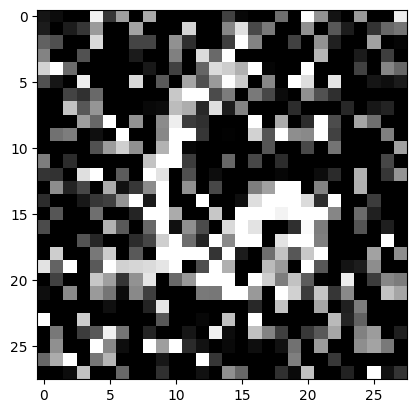

In [24]:
# @title Show Image

plt.imshow(x_test_noisy[index].reshape(28, 28))
plt.gray()

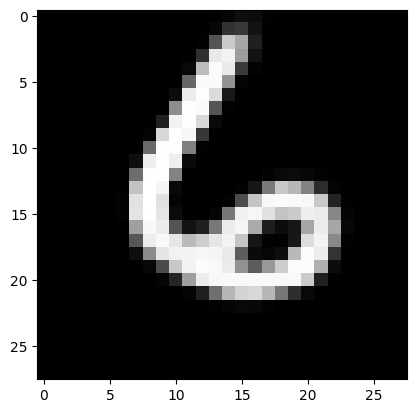

In [25]:
# @title Show Prediction

plt.imshow(pred[index].reshape(28, 28))
plt.gray()

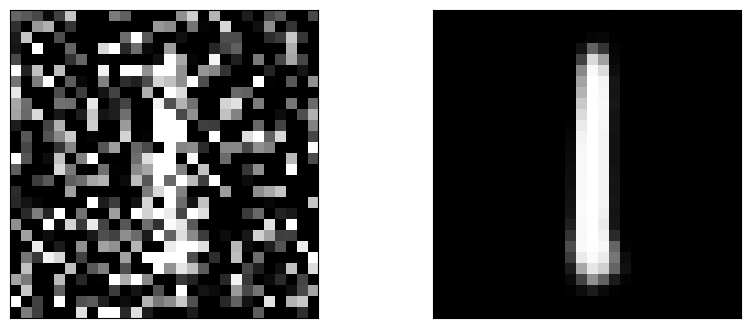

In [32]:
# @title Visualization Together

index = np.random.randint(len(x_test))
plt.figure(figsize=(10, 4))

# Display Original (Noisy) Image
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test_noisy[index].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# Display Denoised Image
ax = plt.subplot(1, 2, 2)
plt.imshow(pred[index].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.show()

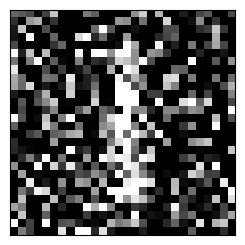

In [34]:
# @title Display Original Image

ax = plt.subplot(1, 2, 1)
plt.imshow(x_test_noisy[index].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

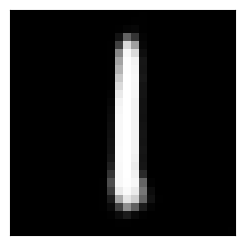

In [33]:
# @title Display Denoised Image

ax = plt.subplot(1, 2, 2)
plt.imshow(pred[index].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.show()